ans = THE CLEAREST NEURAL NETWORK FRAMEWORK BY UNDWAD
classes = [0 1 2 3 4 5 6 7 8 9]
oh = 1
X = matrix [28 28 1 70000]
Y = matrix [1 70000]
oh_ = 1
X_ = matrix [28 28 1 11110]
Y_ = matrix [1 11110]
Yoh_ = matrix [10 11110]
unique(Y_) = [0 1 2 3 4 5 6 7 8 9]
X1 = matrix [28 28 1 9999]
Y1 = matrix [1 9999]
Y1oh = matrix [10 9999]
X2 = matrix [28 28 1 1111]
Y2 = matrix [1 1111]
Y2oh = matrix [10 1111]
unique(Y1) = [0 1 2 3 4 5 6 7 8 9]
unique(Y2) = [0 1 2 3 4 5 6 7 8 9]
BBB = cell [1 313]
BBB{1}.X = matrix [28 28 1 32]
BBB{1}.Y = matrix [10 32]


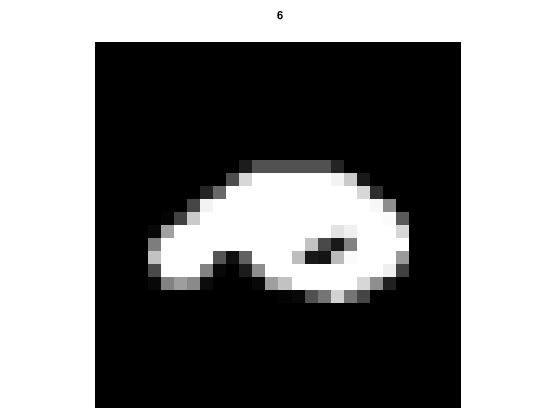

In [1]:
clear all;

global ipynb = 'mnist-conv2D-test';

source('clearest-nn.m');
source('utils-logging.m');
source('utils-training.m');

% log2file(tmp('log'));

##########################################

mnist     = load('datasets/mnist-original.mat');
X         = mnist.data;
X         = reshape(X, 28, 28, 1, []);
Y         = mnist.label;
X         = double(X) / 255;
classes   = unique(Y); printvar('classes');
Yoh       = onehots(Y, classes);  
[X,Y,Yoh] = shuffle(X,Y,Yoh);
oh        = all(Y == onecolds(Yoh, classes, -1))
printsize('X');
printsize('Y');

idx = map(@(c) find(Y == c, 1111, 'first'), classes);
X_   =   X(:,:,:,idx);
Y_   =   Y(:,    idx);
Yoh_ = Yoh(:,    idx);
[X_,Y_,Yoh_] = shuffle(X_,Y_,Yoh_);
oh_          = all(Y_ == onecolds(Yoh_, classes, -1))

printsize('X_');
printsize('Y_');
printsize('Yoh_');
printvar('unique(Y_)');

m    = fix(count(X_) * 0.9);
X1   =   X_(:,:,:,   1:m);
Y1   =   Y_(:,       1:m);
Y1oh = Yoh_(:,       1:m);
X2   =   X_(:,:,:, m+1:end);
Y2   =   Y_(:,     m+1:end);
Y2oh = Yoh_(:,     m+1:end);

printsize('X1');
printsize('Y1');
printsize('Y1oh');
printsize('X2');
printsize('Y2');
printsize('Y2oh');
printvar('unique(Y1)');
printvar('unique(Y2)');

BBB = minibatches(X1, Y1oh, 32);
printsize('BBB');
printsize('BBB{1}.X');
printsize('BBB{1}.Y');

function SHOW(x, y)
    figure;
    imshow(x);
    title(disp(y));
end

function acc = TEST(CTX, X, Y, classes, alt)
    m   = count(X);
    Z   = predict(CTX, X);
    Z   = maxcolds(Z, classes, alt);
    acc = nnz(Z == Y) / m;
end

function TEST1(CTX, x, classes, alt)
    x(:,:,:,2) = x;
    z = predict(CTX, x);
    x = x(:,:,:,1);
    z = z(:,1);
    z = maxcolds(z, classes, alt);
    SHOW(x, z);
end

function TESTCTX(path)
    printvar('path');
    X1      = evalin('caller', 'X1');
    Y1      = evalin('caller', 'Y1');
    X2      = evalin('caller', 'X2');
    Y2      = evalin('caller', 'Y2');
    X       = evalin('caller', 'X');
    Y       = evalin('caller', 'Y');
    classes = evalin('caller', 'classes');
    load('-binary', path, 'CTX');
%     printmodel('CTX');
    train_accuracy = TEST(CTX, X1, Y1, classes, alt=-1); printvar('train_accuracy');
    test_accuracy  = TEST(CTX, X2, Y2, classes, alt=-1); printvar('test_accuracy');
    mnist_accuracy = TEST(CTX, X,  Y,  classes, alt=-1); printvar('mnist_accuracy');
end

[x,y] = pick(X1, Y1);
SHOW(x,y);


In [2]:
TESTCTX('tmp/mnist-conv2D-Copy1.ctx');

path = tmp/mnist-conv2D-Copy1.ctx
train_accuracy = 0.918392
test_accuracy = 0.928893
mnist_accuracy = 0.919214


In [3]:
TESTCTX('tmp/mnist-conv2D-Copy2.ctx');

path = tmp/mnist-conv2D-Copy2.ctx
train_accuracy = 0.918392
test_accuracy = 0.928893
mnist_accuracy = 0.919214


In [4]:
TESTCTX('tmp/mnist-conv2D-Copy3.ctx');

path = tmp/mnist-conv2D-Copy3.ctx
train_accuracy = 0.931193
test_accuracy = 0.937894
mnist_accuracy = 0.931400


In [5]:
TESTCTX('tmp/mnist-conv2D-Copy4.ctx');

path = tmp/mnist-conv2D-Copy4.ctx
train_accuracy = 0.933093
test_accuracy = 0.938794
mnist_accuracy = 0.932057


In [6]:
TESTCTX('tmp/mnist-conv2D-Copy5.ctx');

path = tmp/mnist-conv2D-Copy5.ctx
train_accuracy = 0.933293
test_accuracy = 0.937894
mnist_accuracy = 0.932757


In [7]:
TESTCTX('tmp/mnist-conv2D-Copy6.ctx');

path = tmp/mnist-conv2D-Copy6.ctx
train_accuracy = 0.934793
test_accuracy = 0.936094
mnist_accuracy = 0.934771


In [8]:
TESTCTX('tmp/mnist-conv2D-Copy7.ctx');

path = tmp/mnist-conv2D-Copy7.ctx
train_accuracy = 0.939394
test_accuracy = 0.940594
mnist_accuracy = 0.938771


In [12]:
TESTCTX('tmp/mnist-conv2D-Copy8.ctx');

path = tmp/mnist-conv2D-Copy8.ctx
train_accuracy = 0.939394
test_accuracy = 0.940594
mnist_accuracy = 0.938786


In [13]:
TESTCTX('tmp/mnist-conv2D-Copy9.ctx');

path = tmp/mnist-conv2D-Copy9.ctx
train_accuracy = 0.939094
test_accuracy = 0.940594
mnist_accuracy = 0.938729


In [15]:
TESTCTX('tmp/mnist-conv2D-Copy10.ctx');

path = tmp/mnist-conv2D-Copy10.ctx
train_accuracy = 0.939394
test_accuracy = 0.941494
mnist_accuracy = 0.939043


In [22]:
TESTCTX('tmp/mnist-conv2D-Copy11.ctx');

path = tmp/mnist-conv2D-Copy11.ctx
train_accuracy = 0.939594
test_accuracy = 0.941494
mnist_accuracy = 0.938914


In [24]:
TESTCTX('tmp/mnist-conv2D-Copy12.ctx');

path = tmp/mnist-conv2D-Copy12.ctx
train_accuracy = 0.938894
test_accuracy = 0.938794
mnist_accuracy = 0.939271


In [31]:
TESTCTX('tmp/mnist-conv2D-Copy13.ctx');

path = tmp/mnist-conv2D-Copy13.ctx
train_accuracy = 0.938294
test_accuracy = 0.942394
mnist_accuracy = 0.938929


In [37]:
TESTCTX('tmp/mnist-conv2D.ctx');

path = tmp/mnist-conv2D.ctx
train_accuracy = 0.936494
test_accuracy = 0.942394
mnist_accuracy = 0.937029


In [ ]:
% load('-binary', 'tmp/mnist-conv2D-momentum-0.949.ctx', 'CTX');
% CTX.layers = updateunit(CTX.layers, 'reshape', 'flatten', 1);
% printmodel('CTX');
% save('-binary', 'tmp/mnist-conv2D-momentum-0.949-fixed.ctx', 'CTX');

In [6]:
TESTCTX('tmp/mnist-conv2D-momentum-0.949-fixed.ctx');

path = tmp/mnist-conv2D-momentum-0.949-fixed.ctx
train_accuracy = 0.946795
test_accuracy = 0.945995
mnist_accuracy = 0.949357


In [11]:
notifed = pushnotify([ipynb ' TESTING FINISHED'])

notifed = 1
